<a href="https://colab.research.google.com/github/jimmyzhang2003/COVIDStatusPrediction/blob/main/analysis/COVID_Antibody_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing RT-PCR Test Result with COVID Antibody Result**

(Not used in main study)

In [ ]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
import pandas as pd     
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

In [ ]:
import os
path_to_data = 'MSSM_COVID_FINAL/UPDATED_DATASETS/'
files = []
for file in os.listdir(path_to_data):
  if file.endswith('.txt'):
    files.append(file)
print(files)


#load datasets
train_df = pd.read_csv(path_to_data + files[4], sep="\t", 
                        error_bad_lines=False, encoding='latin1')
test_df = pd.read_csv(path_to_data + files[3], sep="\t", 
                        error_bad_lines=False, encoding='latin1')
patient_df = pd.read_csv(path_to_data + files[2], sep="\t", 
                        error_bad_lines=False, encoding='latin1')

['0413_TESTED_0602_UPDATE.txt', '0602_TESTED_MINUS0413.txt', '0805_OUTPATIENT_ADULTS_TESTED.txt', '0602_ML_PREDICTIONS.txt', '0413_ML_PREDICTIONS.txt']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
patient_df.ENC_TIME_PERIOD.value_counts()

August5    29405
June2      12255
April13     5119
Name: ENC_TIME_PERIOD, dtype: int64

In [ ]:
#create separate april and june datasets
april_df = patient_df.copy()[patient_df['ENC_TIME_PERIOD'] == 'April13']
april_df.reset_index(drop=True, inplace=True)

june_df = patient_df.copy()[patient_df['ENC_TIME_PERIOD'] == 'June2']
june_df.reset_index(drop=True, inplace=True)

In [ ]:
#drop all columns except identifiers, covid status, antibody status, and ML prediction
in_cols = ['NEW_MASKED_MRN', 'NEW_MASKED_ENCOUNTER_EPIC_CSN', 'COVID_POS', 'COVID_QUANT_AB', 'PREDICTION']
out_cols1 = [col for col in test_df.columns if col not in in_cols]
out_cols2 = [col for col in patient_df.columns if col not in in_cols]
out_cols3 = [col for col in train_df.columns if col not in in_cols]

test_df.drop(columns = out_cols1, axis = 1, inplace=True)
june_df.drop(columns = out_cols2, axis = 1, inplace=True)
train_df.drop(columns = out_cols3, axis = 1, inplace=True)
april_df.drop(columns = out_cols2, axis = 1, inplace=True)

In [ ]:
#match patients in 0602 dataset to june patients in 0805 dataset (to get antibody data)
june_antibody_df = pd.merge(test_df, june_df, how='inner', on=['NEW_MASKED_MRN', 'NEW_MASKED_ENCOUNTER_EPIC_CSN'])

In [ ]:
june_antibody_pos_df = june_antibody_df.copy()[june_antibody_df.COVID_QUANT_AB.notna()]
june_antibody_pos_df.reset_index(drop = True, inplace=True)

In [ ]:
june_antibody_pos_df.shape[0] #41 total patients with antibody data in June dataset

41

In [ ]:
june_antibody_pos_df.drop(columns = ['COVID_POS_y'], axis =1, inplace=True) #repeated variable
june_antibody_pos_df.rename(columns = {'COVID_POS_x': 'COVID_POS'}, inplace=True)

In [ ]:
june_antibody_pos_df

,NEW_MASKED_MRN,NEW_MASKED_ENCOUNTER_EPIC_CSN,COVID_POS,PREDICTION,COVID_QUANT_AB
0,9492C61155328E9A5792F65D62BD557598BAC94A121165...,374A6F5D21F5DD8131B6118838370C9A4A0792522BE978...,False,0,320.0
1,D60F1F7D4E68F85F36AB5BF018511E9B44A4CCEBAE673B...,ED92AEA39F812A9C567215555C2B0B104052E049990BDA...,False,1,2880.0
2,4998921155C37DDAB335C2272305EA82642F31B7DBE1A6...,883A7184960F08FEE639F4AF8F17C911EE228C20089CFB...,False,1,2880.0
3,5F16631629CAFDFBDB5B9B1F7FD0E265081F794685C51E...,C6D2852E713D7A83C04FFEC5AB1ECBA4A25BAD55AEA6C7...,False,1,960.0
4,BEC0A4D4C1284C662A4ABE57CBD2D83F108E307FD9E1BF...,8A7C640AE50336707F06F8058804BA8418435E5A0CD434...,False,1,960.0
5,D8AB07D2533DB02A6C368BCBE62586468AE98AE0BC3440...,831D6367A483C51AB0A3A72F4134D6AA47A14038E250E0...,False,0,2880.0
6,01C465441962FC0981DDC277A638F7F27EDB181D17C786...,3EB49797D747EE0086709EA25A0A97AAAAD80B0AC3401C...,False,0,320.0
7,3020579108E269AAAE3483A9A40AECC6F0B9E78FD9AD8D...,52724997DC3713F2A09DA4C28FF728B8E27143AFB09208...,False,0,320.0
8,7541E66015BF877DCD472DEC403766BB4F0ABF932ED6C0...,B72A9681CEB9F15BDB307C8F9CD9ACC0F9A35ABD13785D...,False,0,320.0
9,3288183A722CE3DC7913F48CA3185953BDDC23602BEFC3...,B01899522B9180B0AFF44374597A269BBB225A1439470D...,True,0,320.0


In [ ]:
sum((june_antibody_pos_df.PREDICTION == 0) & (june_antibody_pos_df.COVID_POS == 1))

11

In [ ]:
#match patients in 0413 dataset to april patients in 0805 dataset (train)
april_antibody_df = pd.merge(train_df, april_df, how='inner', on=['NEW_MASKED_MRN', 'NEW_MASKED_ENCOUNTER_EPIC_CSN'])

In [ ]:
april_antibody_pos_df = april_antibody_df.copy()[april_antibody_df.COVID_QUANT_AB.notna()]
april_antibody_pos_df.reset_index(drop = True, inplace=True)

In [ ]:
april_antibody_pos_df.drop(columns = ['COVID_POS_y'], axis =1, inplace=True) #repeated variable
april_antibody_pos_df.rename(columns = {'COVID_POS_x': 'COVID_POS'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


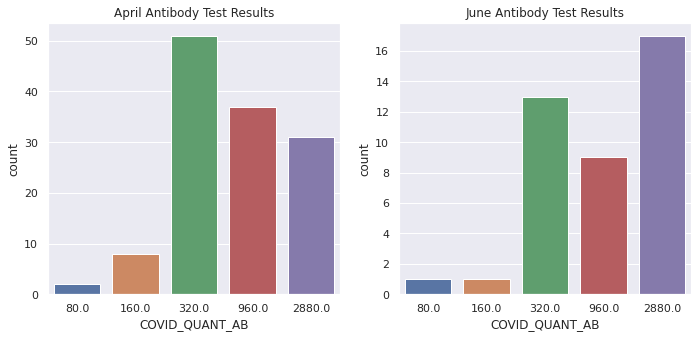

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
sns.countplot(april_antibody_pos_df['COVID_QUANT_AB'], ax = ax[0]).set_title('April Antibody Test Results')
sns.countplot(june_antibody_pos_df['COVID_QUANT_AB'], ax = ax[1]).set_title('June Antibody Test Results')
fig.tight_layout(pad = 1.5)
fig.show()

In [ ]:
june_antibody_pos_df

,NEW_MASKED_MRN,NEW_MASKED_ENCOUNTER_EPIC_CSN,COVID_POS,PREDICTION,COVID_QUANT_AB
0,9492C61155328E9A5792F65D62BD557598BAC94A121165...,374A6F5D21F5DD8131B6118838370C9A4A0792522BE978...,False,0,320.0
1,D60F1F7D4E68F85F36AB5BF018511E9B44A4CCEBAE673B...,ED92AEA39F812A9C567215555C2B0B104052E049990BDA...,False,1,2880.0
2,4998921155C37DDAB335C2272305EA82642F31B7DBE1A6...,883A7184960F08FEE639F4AF8F17C911EE228C20089CFB...,False,1,2880.0
3,5F16631629CAFDFBDB5B9B1F7FD0E265081F794685C51E...,C6D2852E713D7A83C04FFEC5AB1ECBA4A25BAD55AEA6C7...,False,1,960.0
4,BEC0A4D4C1284C662A4ABE57CBD2D83F108E307FD9E1BF...,8A7C640AE50336707F06F8058804BA8418435E5A0CD434...,False,1,960.0
5,D8AB07D2533DB02A6C368BCBE62586468AE98AE0BC3440...,831D6367A483C51AB0A3A72F4134D6AA47A14038E250E0...,False,0,2880.0
6,01C465441962FC0981DDC277A638F7F27EDB181D17C786...,3EB49797D747EE0086709EA25A0A97AAAAD80B0AC3401C...,False,0,320.0
7,3020579108E269AAAE3483A9A40AECC6F0B9E78FD9AD8D...,52724997DC3713F2A09DA4C28FF728B8E27143AFB09208...,False,0,320.0
8,7541E66015BF877DCD472DEC403766BB4F0ABF932ED6C0...,B72A9681CEB9F15BDB307C8F9CD9ACC0F9A35ABD13785D...,False,0,320.0
9,3288183A722CE3DC7913F48CA3185953BDDC23602BEFC3...,B01899522B9180B0AFF44374597A269BBB225A1439470D...,True,0,320.0


In [ ]:
o#match patients in 0602 dataset to june patients in 0805 dataset (to get antibody data)
#june_antibody_df = pd.DataFrame()
#for i, x in test_df_updated.iterrows():
 # for j, y in june_df_updated.iterrows():
  #  if x.NEW_MASKED_MRN == y.NEW_MASKED_MRN and x.NEW_MASKED_ENCOUNTER_EPIC_CSN == y.NEW_MASKED_ENCOUNTER_EPIC_CSN:
   #   june_antibody_df.append(y)

In [ ]:
#for debugging
for i, x in june_antibody_df.iterrows():
  for j, y in june_df.iterrows():
    if x.NEW_MASKED_MRN == y.NEW_MASKED_MRN and x.NEW_MASKED_ENCOUNTER_EPIC_CSN == y.NEW_MASKED_ENCOUNTER_EPIC_CSN:
      print(i, j)